This is the first version I submitted to Weber Shandwick, when I was almost first introduced in Python data analysis. This work was considered as a top candidate for the challenge and does its work, but I thought there is a room for improvement. I still share this with you because this is a good exapmle of how I can learn new materials in a short period of time (2days).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re

In [3]:
# import data
df = pd.read_csv('Diet Coke Raw Data.csv',skiprows=5,low_memory=False)

# Task 1

In [47]:
df['Page_Type']=df['Page_Type'].str.lower()
df = df[df.Page_Type.isin(['twitter', 'instagram', 'facebook', 'news', 'blog','forum'])]
df['Category']=df['Page_Type'].map({'twitter':'Social','instagram':'Social', 'facebook':'Social',
                                   'news':'News','blog':'Blog & Forum','forum':'Blog & Forum'}) #mapping into types
df.Sentiment = df.Sentiment.apply(pd.to_numeric, downcast='float',errors='coerce').dropna()
sentsum=df.groupby(['Category'])['Sentiment'].sum()
max_sent=sentsum.max()
pos_sent=df.groupby(['Category'])['Sentiment'].value_counts(bins=3)[:]
print(max_sent)
df1=pd.DataFrame(data={'Pos Max':['Social'],'Total Sentiment':[max_sent]})

378334.0


In [3]:
#Categorize into 'Social','News','Blog & Forum'

df['Page_Type']=df['Page_Type'].str.lower() #I see that there are two types of page types, Initial capitalized and not capitilized so I decided to make everything lower case
df = df[df.Page_Type.isin(['twitter', 'instagram', 'facebook', 'news', 'blog','forum'])] #only keep if they are in required category
conditions = [(df['Page_Type'].isin(['twitter', 'instagram', 'facebook'])),
             (df['Page_Type']=='news'),
             (df['Page_Type'].isin(['blog','forum']))] #conditions to categorize
categories = ['Social','News','Blog & Forum'] #category names
df['Category'] = np.select(conditions, categories) #new row to tag items with their new categories

#Sentiment cleaning
df.Sentiment=df.Sentiment.apply(pd.to_numeric,downcast='float',errors = 'coerce').dropna() #convert all sentiment into float

#Sentiment counting of each category
sentiment_sum=df.groupby(['Category'])['Sentiment'].sum()
df1=pd.DataFrame(index = categories+['Max','Max Value'])
sentiment_sum_highest=np.append(sentiment_sum.values,[sentiment_sum.idxmax(),sentiment_sum.max()])
df1['Sentiment Sum']=sentiment_sum_highest

#Positive sentiment counting
sentiment_sum_each=df.groupby(['Category','Sentiment'])['Sentiment'].sum()
positive_sum=sentiment_sum_each.loc[:,1.0]
pos_sent_sum_max=np.append(positive_sum,[positive_sum.idxmax(),positive_sum.max()])
df1['Positive Sentiment Sum']=pos_sent_sum_max

#export results in csv file
df1.to_csv('task1')

# Task 2

In [55]:
handles = pd.read_csv('Brand Official Handle Keywords.csv')
brand_keys=handles.keys().tolist()

inv_dict=dict()
def inv_dic(target_dict):
    for col in target_dict.keys():
        for row in target_dict[col]:
            inv_dict[row]=col
    return inv_dict

inv_brand=inv_dic(handles)
df['Official']=df.Author.map(inv_brand)

In [1]:
#functions to find the official posts for each brand
handles=pd.read_csv('Brand Official Handle Keywords.csv') #import official handles data
brand_keys=handles.keys().tolist() #extract keys for convenience

def official_posts(df,brand): #returns official mentions of specified brand
    brand_handles=handles[brand]
    return df.Full_Text[df.Author.isin(brand_handles)]

officialrow=pd.Series(dtype=str)  #initiate officialrow
for i in range(len(brand_keys)): #iterate for all brands
    each=official_posts(df,brand_keys[i])
    df2=each.where(official_posts(df,brand_keys[i]).isna(),brand_keys[i])
    x = lambda s1, s2: s2 if s2==brand_keys[i] else s1
    officialrow=officialrow.combine(df2,x) #update Series
    
df['Official']=officialrow #tag each rows

NameError: name 'pd' is not defined

In [58]:
engage=['Blog_Comments','Facebook_Comments','Facebook_Likes','Instagram_Comments','Instagram_Likes','Twitter_Reply_Count','Twitter_Retweets'] #columns that's supposed to be all integers
df[engage]=df[engage].apply(pd.to_numeric,downcast='integer',errors='coerce').dropna()
df['Social Engagements']=df[engage].sum(axis=1)


In [5]:
col_int=['Twitter_Followers','Blog_Comments','Facebook_Comments','Facebook_Likes','Instagram_Comments','Instagram_Followers','Instagram_Likes','Twitter_Reply_Count','Twitter_Retweets'] #columns that's supposed to be all integers
df[col_int]=df[col_int].apply(pd.to_numeric,downcast="integer",errors = 'coerce').dropna() #change all of them into integers. if they aren't convertible to integers, drop them.
df['Social_Engagements']=df[['Instagram_Comments','Blog_Comments','Facebook_Comments','Instagram_Likes','Twitter_Reply_Count','Facebook_Likes']].sum(axis=1) 
#the prompt says include repost but we don't have reposts. I treated reply counts in twitter as comments because that's how people use it like


In [ ]:
df['Date']=pd.to_datetime(df['Date'],errors = 'coerce').dropna()
df['DateYM']=pd.DatetimeIndex(df['Date']).strftime('%Y/%m')
df['DateYM']=df['DateYM'].where(pd.to

In [6]:
df['Date']=pd.to_datetime(df['Date'],errors = 'coerce').dropna() #make sure all Dates are date time format
df['DateYM']=pd.DatetimeIndex(df['Date']).strftime('%Y/%m') #convert Dates into Month/Year
df['DateYM']=df['DateYM'].where(pd.to_datetime(df['DateYM']).dt.strftime('%Y')!='1917','2017/11') #I found 11/1917 that assumed to be 11/2017 bc there was no internet back them so I added it up to 2017
df=df.dropna(subset=['Full_Text']) #clean if Full_Text is not existent

In [7]:
df['Full_Text']=df['Full_Text'].apply(lambda x: x.lower())

In [8]:
#initiate Series objects
aboutrow=pd.Series(dtype=str) 
abouteach=pd.Series(dtype=str) 

#iterate for all brands
for i in range(len(brand_keys)):
    abouteach= df.Full_Text.map(lambda txt: brand_keys[i] if (brand_keys[i].lower() in txt) else None )
    aboutrow=aboutrow.combine(abouteach, lambda row, each: each if each==brand_keys[i] else row)


In [9]:
df['About']=aboutrow #add new column of df for collective brand tags
df3=df.groupby(['DateYM','About'])['Social_Engagements'].sum() #sum of social engagements for each brands of each month

df3.to_csv('task2') #output result

In [10]:
print(df.About)

0             Venmo
1           LaCroix
2             Venmo
3           LaCroix
4         Diet Coke
            ...    
746419    Diet Coke
746420     Glossier
746421        Venmo
746422        Venmo
746423     Glossier
Name: About, Length: 745542, dtype: object


# Task 3

In [11]:
emotions=pd.read_csv('Emotions Keywords.csv') #import keywords csv
emotions_key=emotions.columns #emotion list

In [12]:
social_df=df[df['Category']=='Social'] #get social dataframe handy

In [13]:
emotions['Stressful']=emotions['Stressful'].drop_duplicates() #I found that there are two stressful-s

In [14]:
for i in range(len(emotions.columns)): #for each emotions~almost
    emotion_list = emotions.iloc[:,i].dropna().tolist() #clean list of values of the iterated emotion
    emo_regexs= re.compile(r'\b(:{})\b'.format('|'.join(emotion_list))) #make regex out of list
    emo_bool=social_df.Full_Text.str.contains(emo_regexs) #does the list have the regex
    emo_tag_new=emo_bool.map(lambda emotion: [emotions_key[i]] if emotion==True else []) #put list with emotion name or empty list
    if i == 0: emo_tag_sum = emo_tag_new #for the first iteration, we don't have sum to combine with new
    else: emo_tag_sum=emo_tag_new+emo_tag_sum #combine two lists of series into new series

0


/var/folders/p8/ggm3r0bx14sbjsb1ksyg2y6c0000gn/T/ipykernel_19136/347814978.py:5: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  emo_bool=social_df.Full_Text.str.contains(emo_regexs) #does the list have the regex


1
2
3
4
5
6
7
8
9
10
11
12
13


In [15]:
df['Emotion Topics']=emo_tag_sum.apply(tuple)
# No csv output required, so just added them to original dataframe. it can be outputted at the last kernel if needed

# Task 4

VADER is good for social media texts but it took forever to use its funtions to iterate.
So I also imported nltk to do it as a list comprehension with lexicons from vader.
Be aware that it still takes a lot LONGer than other kernels. 
you don't need to download nltk, lucky!

In [17]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sent = SentimentIntensityAnalyzer()
df['New Sentiment'] = df['Full_Text'].apply(lambda mention: sent.polarity_scores(mention).values())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/syunie/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [19]:
df['New Sentiment']=df['New Sentiment'].apply(lambda dictlist: list(dictlist)) #new sentiment now contians list of neg,neu,pos
df['New Sentiment']=df['New Sentiment'].apply(lambda emotion: emotion[3])

In [20]:
dfgroup=df.groupby(['Emotion Topics'])['New Sentiment'].mean()
df4=pd.DataFrame(columns=emotions_key.to_list())
for i in range(14): #making an empty dataframe as {0: '# of group apperance', 1: 'Sum',2:'Avg'}. will label them later
    df4[emotions_key.to_list()[i]]=[0,0,0]

   Excitement  Surprise  Pleasant  Refreshed  Energetic  Restful  Thankful  \
0           0         0         0          0          0        0         0   
1           0         0         0          0          0        0         0   
2           0         0         0          0          0        0         0   

   Angry  Annoy  Anxiety  Frustration  Powerless  Stressful  Sad  
0      0      0        0            0          0          0    0  
1      0      0        0            0          0          0    0  
2      0      0        0            0          0          0    0  


In [21]:
for i in range(1,len(dfgroup)):
    for l in range(len(dfgroup.keys()[i])):
        df4[dfgroup.keys()[i][l]]=[df4[dfgroup.keys()[i][l]][0]+1,df4[dfgroup.keys()[i][l]][1]+dfgroup[i],0]

df4.iloc[2]=df4.iloc[1].divide(df4.iloc[0])
df4=df4.rename(index={0: '# of group apperance', 1: 'Sum',2:'Avg'})
df4.to_csv('task4') #export result

# Task 5

In [22]:
df['Weeks']=df.Date.dt.isocalendar().week
df['Years']=df.Date.dt.isocalendar().year
df['Years']=df['Years'].where(df['Years']!=1917,2017) #replacing 1917 to 2017

In [23]:
#I will use only a part of the df to make my computer work less.. 

social_df=df[df['Category']=='Social'].filter(items=['Social_Engagements','Years','Weeks','New Sentiment'])
print(social_df.head())

   Social_Engagements  Years  Weeks  New Sentiment
0                 0.0   2018      3         0.8513
1                 0.0   2018      2         0.1280
2                 0.0   2017     48        -0.5667
3                 0.0   2018      2         0.0000
4                 0.0   2017     49         0.5267


In [24]:
social_df['Sign sentiment'] = np.sign(df['New Sentiment'])
possum=social_df.groupby(['Years','Weeks'])['Sign sentiment'].value_counts().unstack()[0] #sum of all positive sentiments each week
allsum=social_df.groupby(['Years','Weeks'])['Sign sentiment'].value_counts().unstack().sum(axis=1) #sum of all sentimenrs each week
pos_per=possum.divide(allsum)*100 #make it percentage

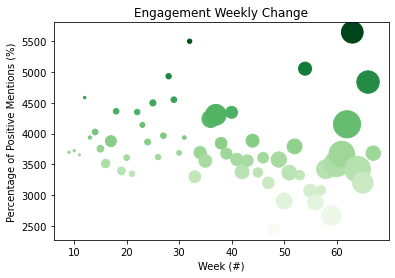

In [25]:
# create data
x = np.array(range(9,52+16)) #week
y = np.array(pos_per.multiply(100)).astype('float') #percentage of positive mentions
z = np.array(social_df.groupby(['Years','Weeks'])['Social_Engagements'].sum()) #engagement
colors = np.random.rand(40) 

plt.scatter(x, y, s=z/800, c=y, cmap='Greens')
plt.title('Engagement Weekly Change')
plt.xlabel('Week (#)')
plt.ylabel('Percentage of Positive Mentions (%)')
plt.show()

The size of the bubble indicates the size of engagements on social mentions

# Relevant Works

In [26]:
df.to_csv('dataframe scraps')

I am not sure if I can disclose the sample csv data. 